In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix


In [ ]:
df=pd.read_csv('/content/data.csv',encoding='unicode_escape')
# Reading the datasetday

In [ ]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124214 entries, 0 to 124213
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     79498 non-null   object 
 1   sampling_date                124214 non-null  object 
 2   state                        124214 non-null  object 
 3   location                     124214 non-null  object 
 4   agency                       77966 non-null   object 
 5   type                         122585 non-null  object 
 6   so2                          110390 non-null  float64
 7   no2                          118775 non-null  float64
 8   rspm                         110683 non-null  float64
 9   spm                          62317 non-null   float64
 10  location_monitoring_station  115479 non-null  object 
 11  pm2_5                        4249 non-null    float64
 12  date                         124213 non-null  object 
dtyp

In [ ]:
df.isnull().sum()

,0
stn_code,44716
sampling_date,0
state,0
location,0
agency,46248
type,1629
so2,13824
no2,5439
rspm,13531
spm,61897


In [ ]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,110390.000000,118775.000000,110683.000000,62317.000000,4249.000000
mean,9.165944,21.838499,99.510889,211.332575,32.435232
std,8.521199,15.317399,63.694807,138.093404,25.360678
min,0.000000,0.000000,0.000000,0.000000,7.000000
25%,4.000000,13.000000,61.000000,126.000000,22.000000
50%,7.000000,18.000000,85.000000,186.000000,29.000000
75%,12.000000,26.200000,120.000000,268.000000,34.000000
max,228.000000,334.900000,1082.000000,2213.000000,318.000000


In [ ]:
df.nunique()

,0
stn_code,210
sampling_date,5021
state,13
location,109
agency,22
type,10
so2,1181
no2,1665
rspm,1515
spm,2189


In [ ]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

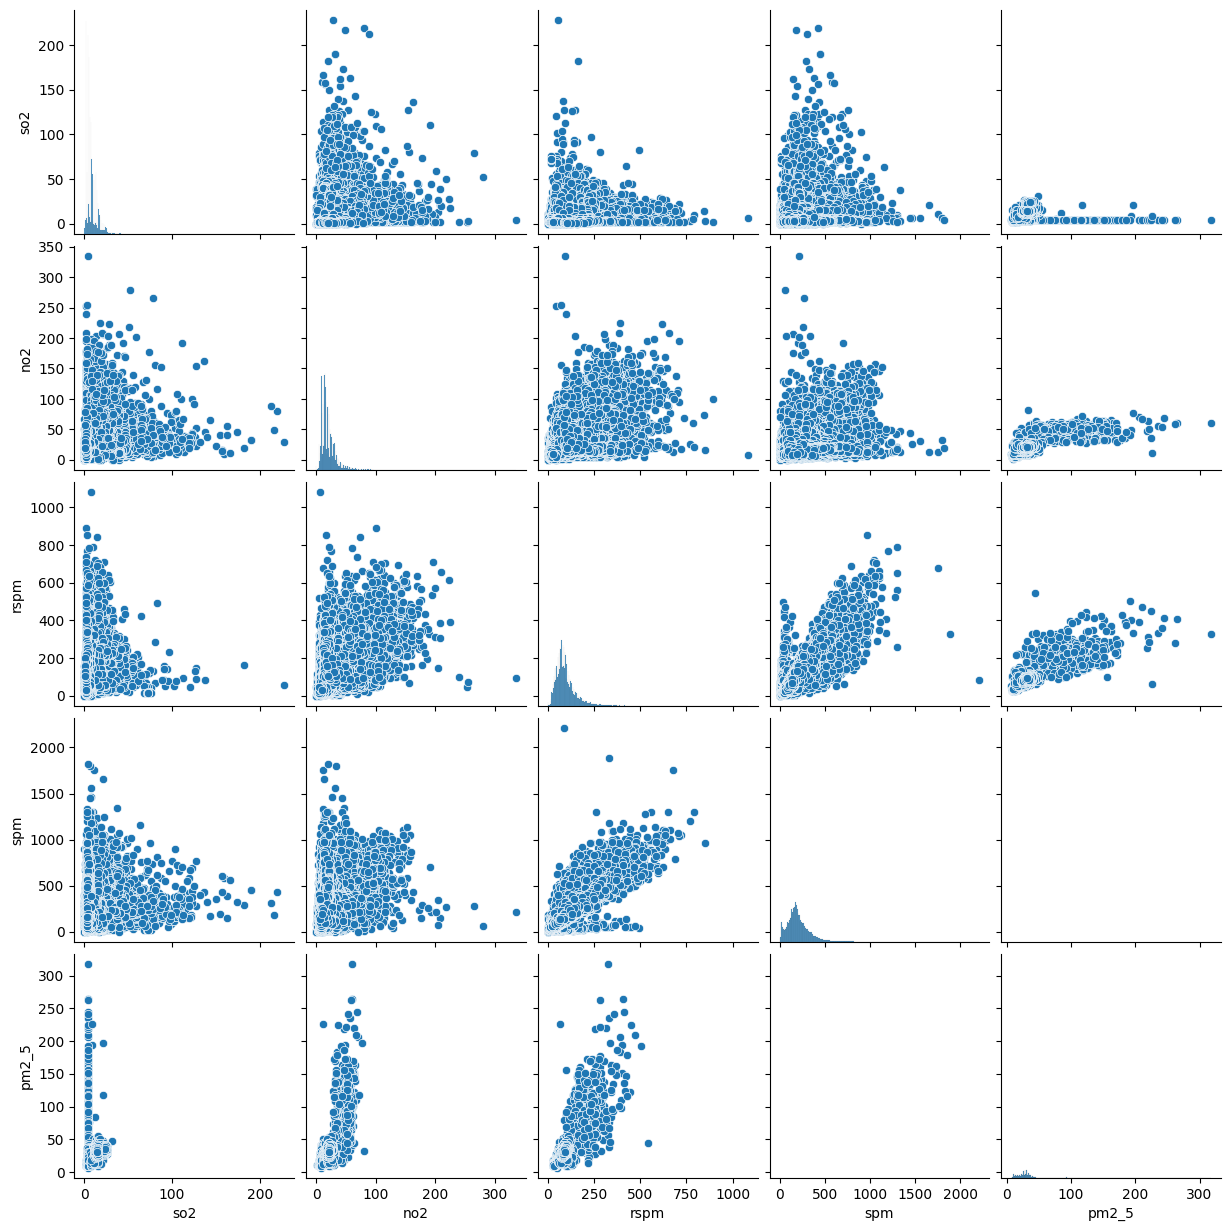

In [ ]:
sns.pairplot(data=df)

In [ ]:
df['state'].value_counts()

,count
state,
Andhra Pradesh,26368
Gujarat,21279
Assam,19361
Himachal Pradesh,18897
Delhi,8551
Chandigarh,8520
Chhattisgarh,7831
Goa,6206
Haryana,3420


In [ ]:
df['state'].value_counts()

,count
state,
Andhra Pradesh,26368
Gujarat,21279
Assam,19361
Himachal Pradesh,18897
Delhi,8551
Chandigarh,8520
Chhattisgarh,7831
Goa,6206
Haryana,3420


[]

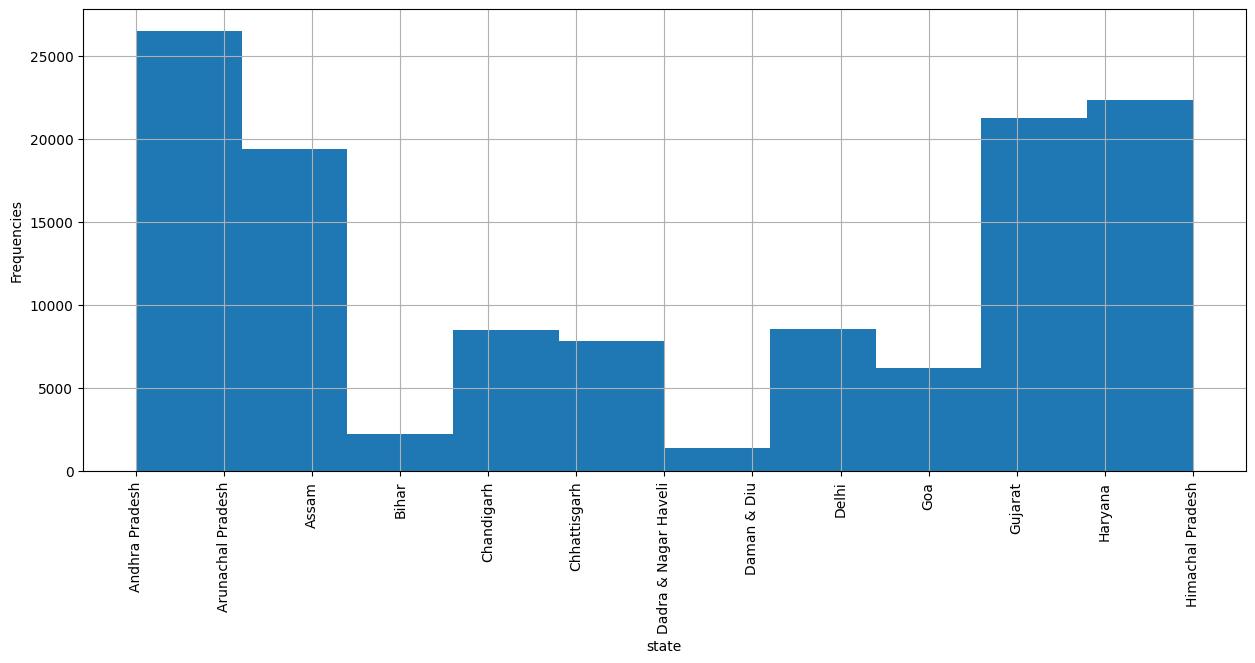

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset.

In [ ]:
df['type'].value_counts()
# Viewing the count of values present in the type column

,count
type,
"Residential, Rural and other Areas",53887
Residential and others,29505
Industrial Area,20439
Industrial Areas,13338
Sensitive Area,2778
Sensitive Areas,1873
RIRUO,473
Sensitive,155
Residential,69


[]

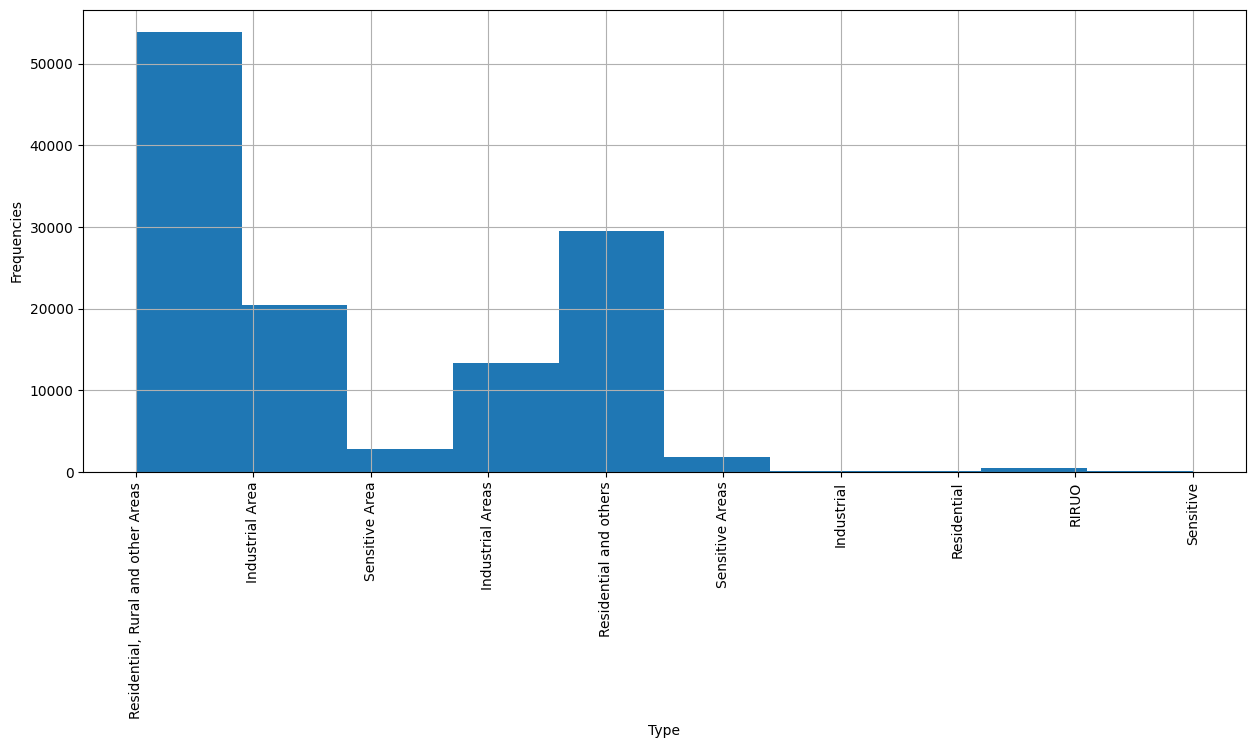

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Types present in the dataset.

In [ ]:
df['agency'].value_counts()

,count
agency,
Andhra Pradesh State Pollution Control Board,15691
Assam State Pollution Control Board,13427
Himachal Pradesh State Environment Proection & Pollution Control Board,11287
Gujarat State Pollution Control Board,8763
Goa State Pollution Control Board,5040
Chandigarh Pollution Control Committee,4614
Chattisgarh Environment Conservation Board,4051
Central Pollution Control Board,3604
National Environmental Engineering Research Institute,3243


[]

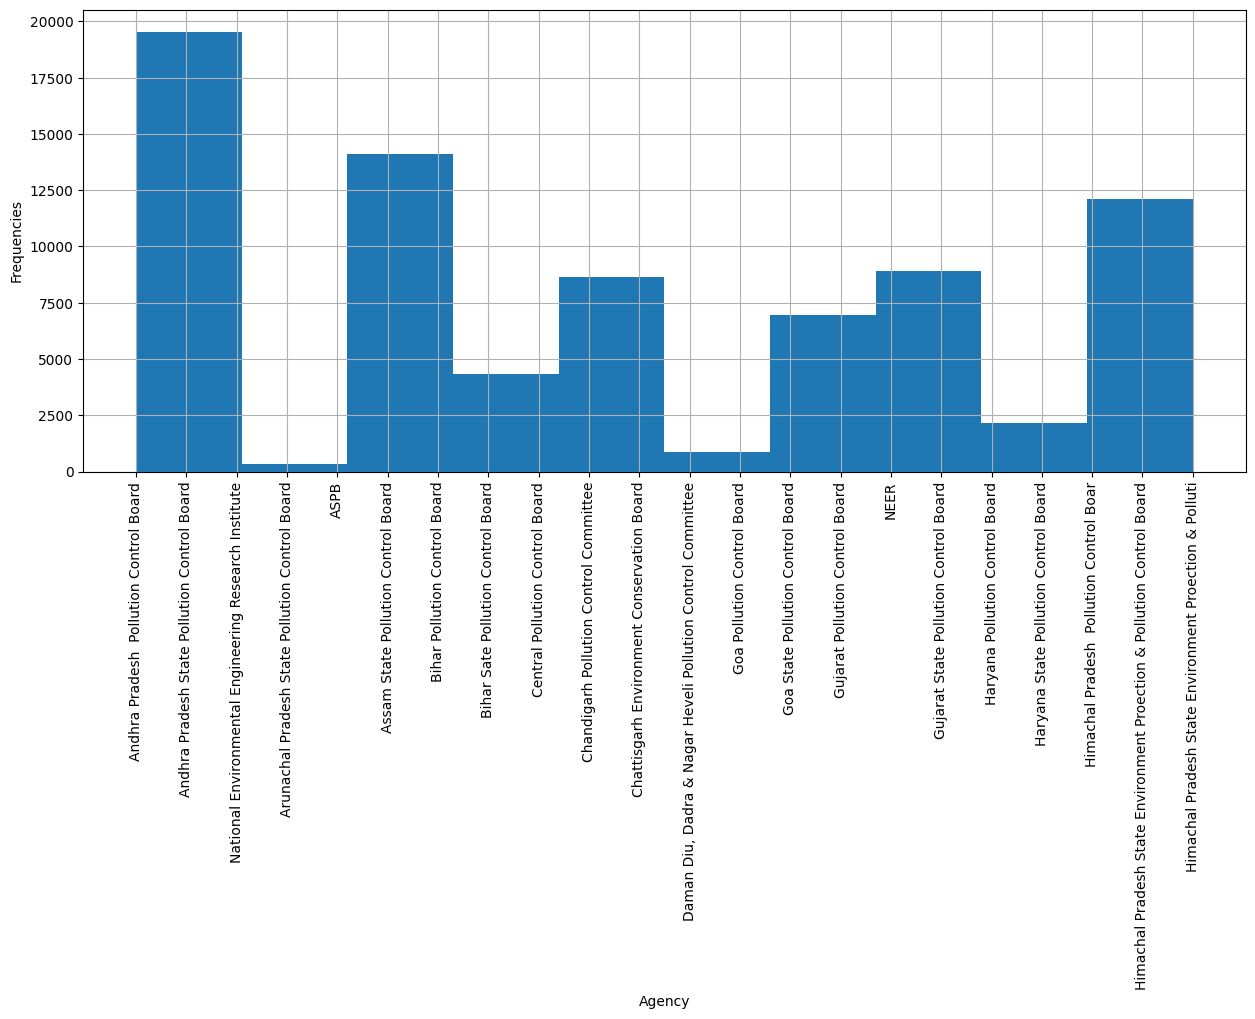

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()

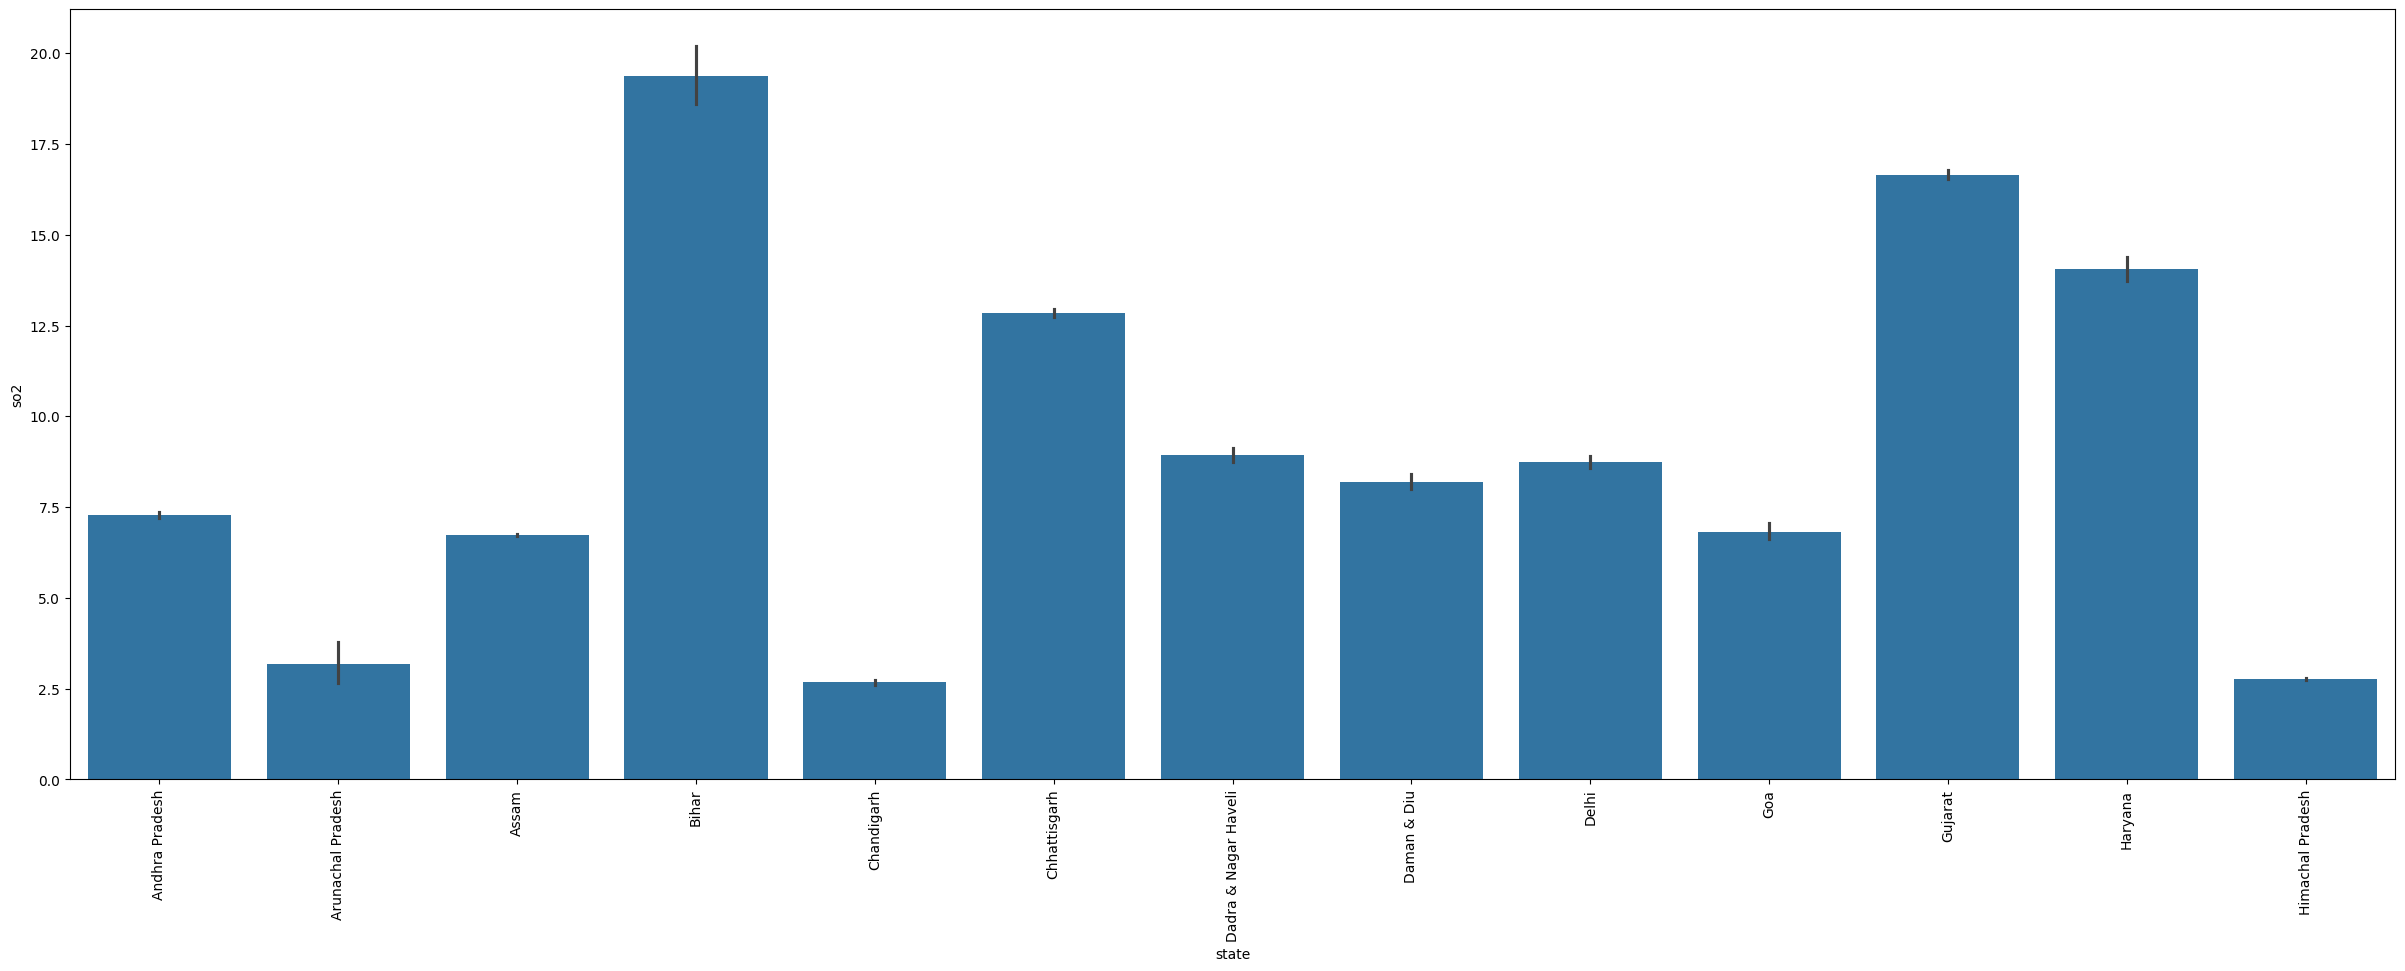

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
# This visualization shows the name of the state having higher so2 levels in the air which is Uttaranchal followed by Uttarakhand

In [ ]:
plt.rcParams['figure.figsize']=(30,10)

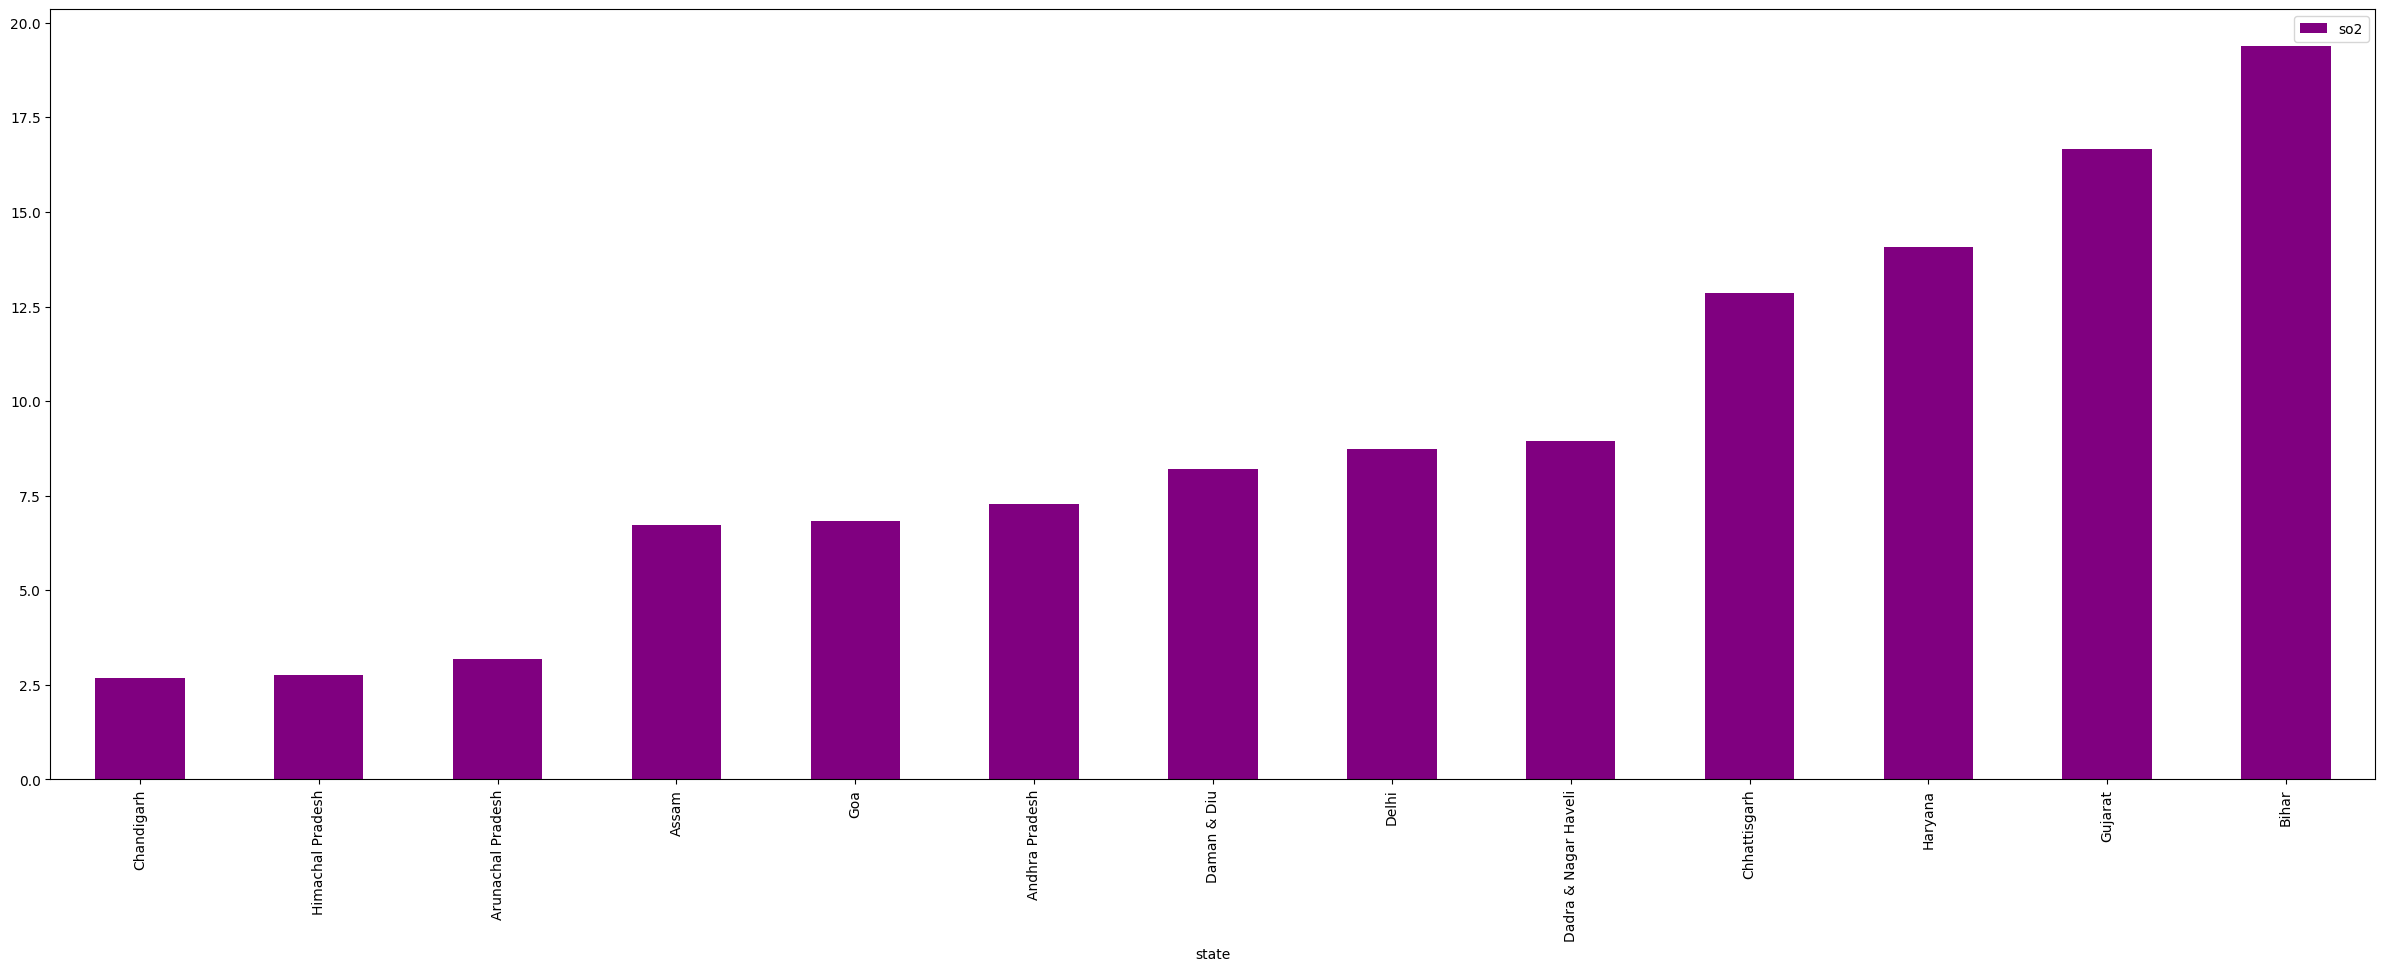

In [ ]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 levels.

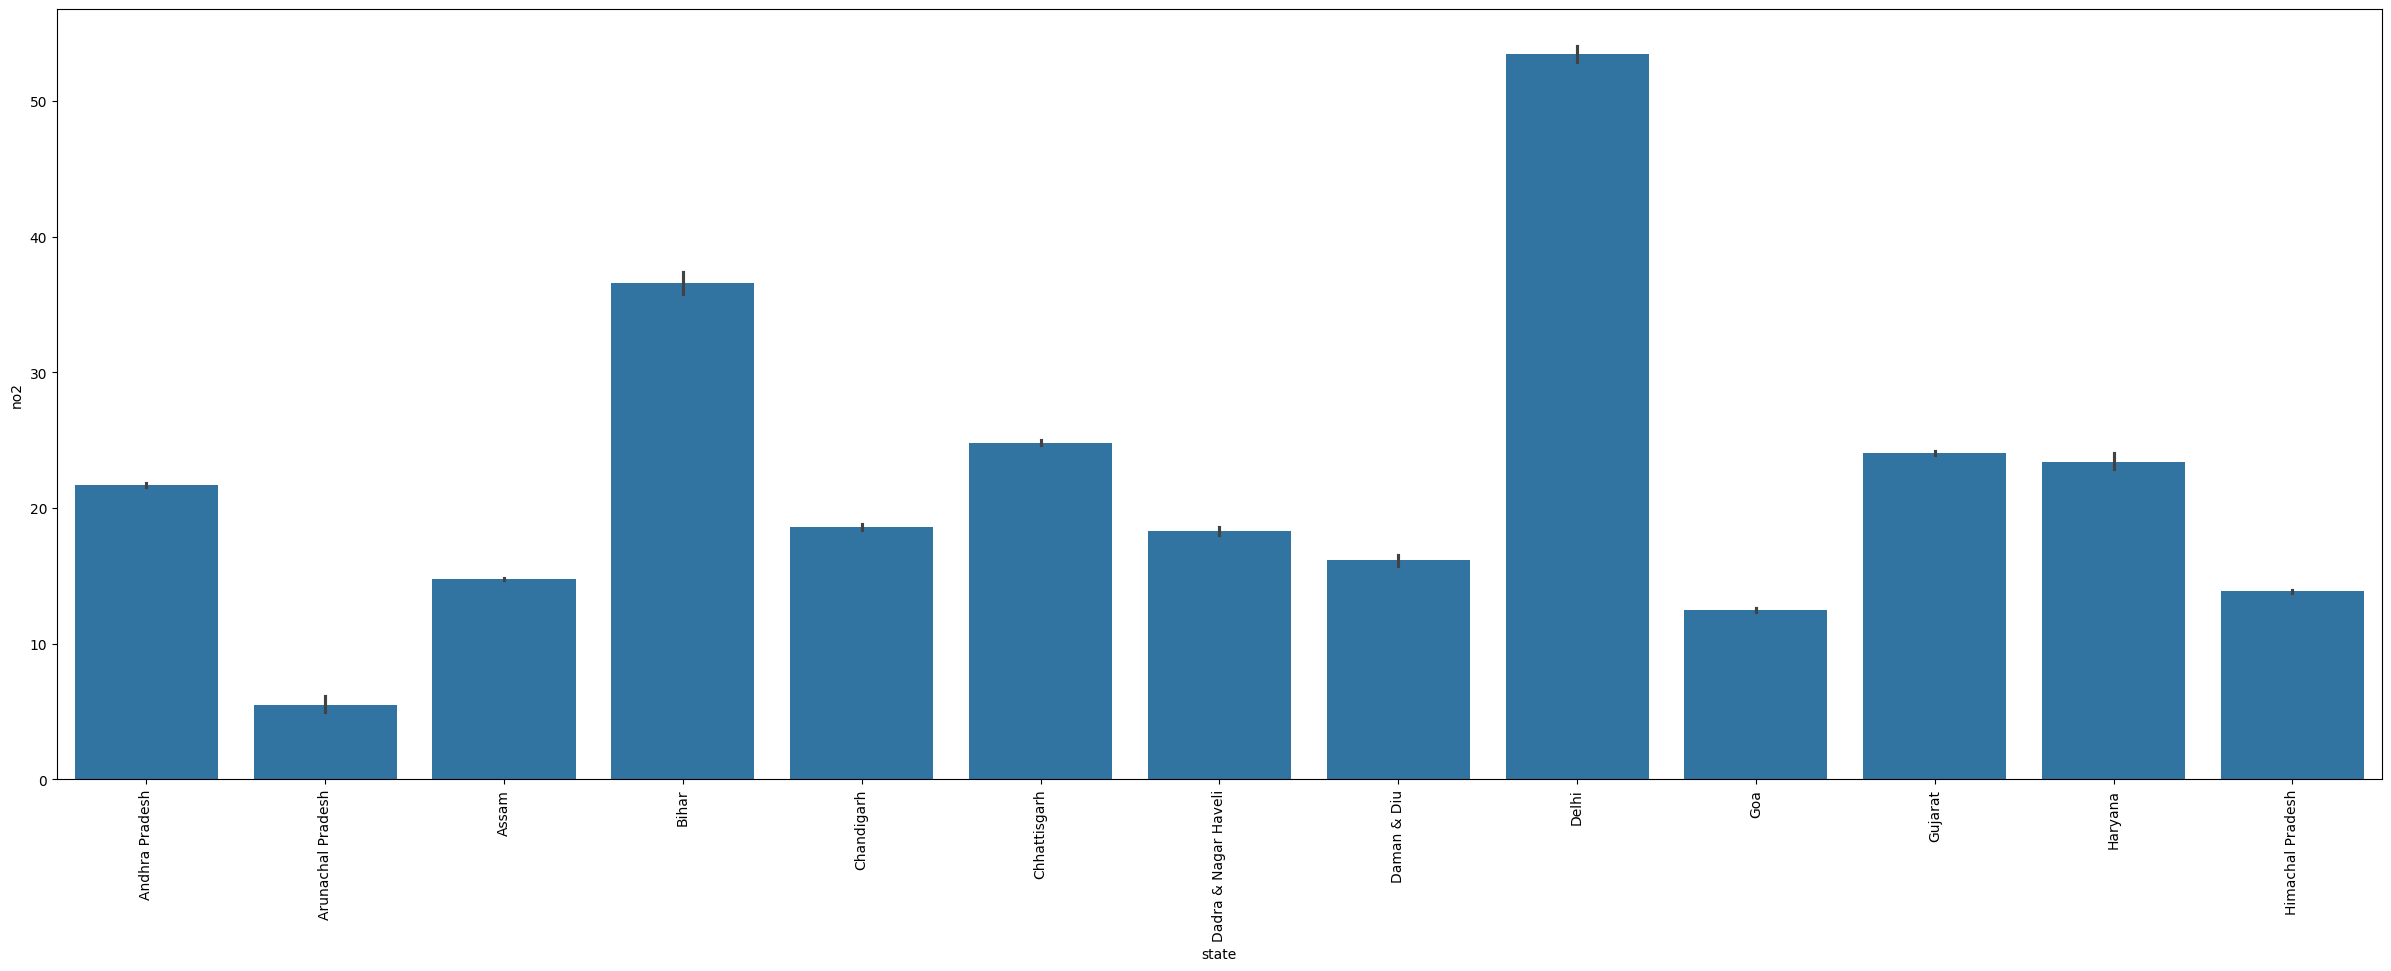

In [ ]:
# Convert 'no2' column to numeric, handling errors
df['no2'] = pd.to_numeric(df['no2'], errors='coerce')

# Drop rows with NaN values in 'no2' after conversion
df.dropna(subset=['no2'], inplace=True)

# Now create the barplot
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='no2', data=df)
plt.show()  # Ensure the plot is displayed

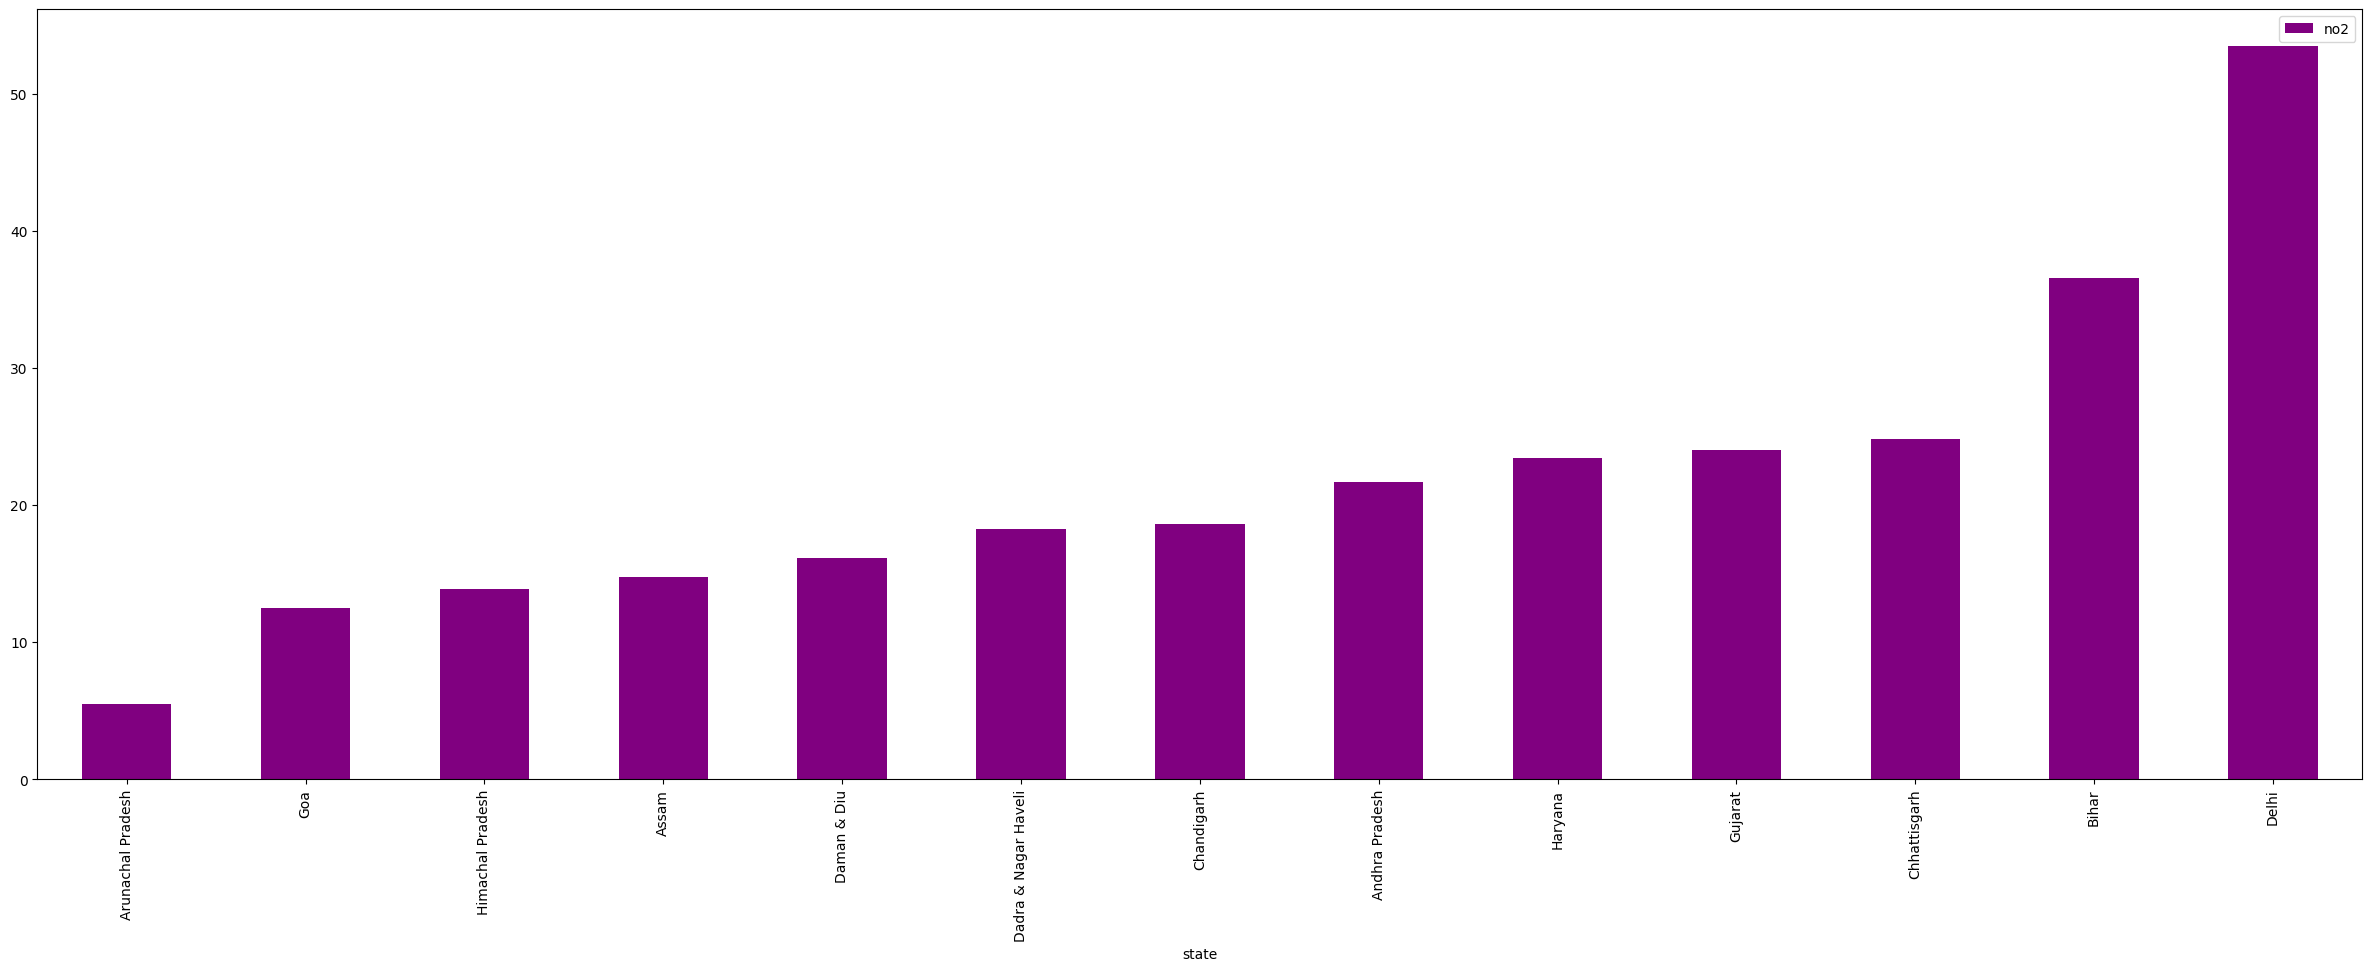

In [ ]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()


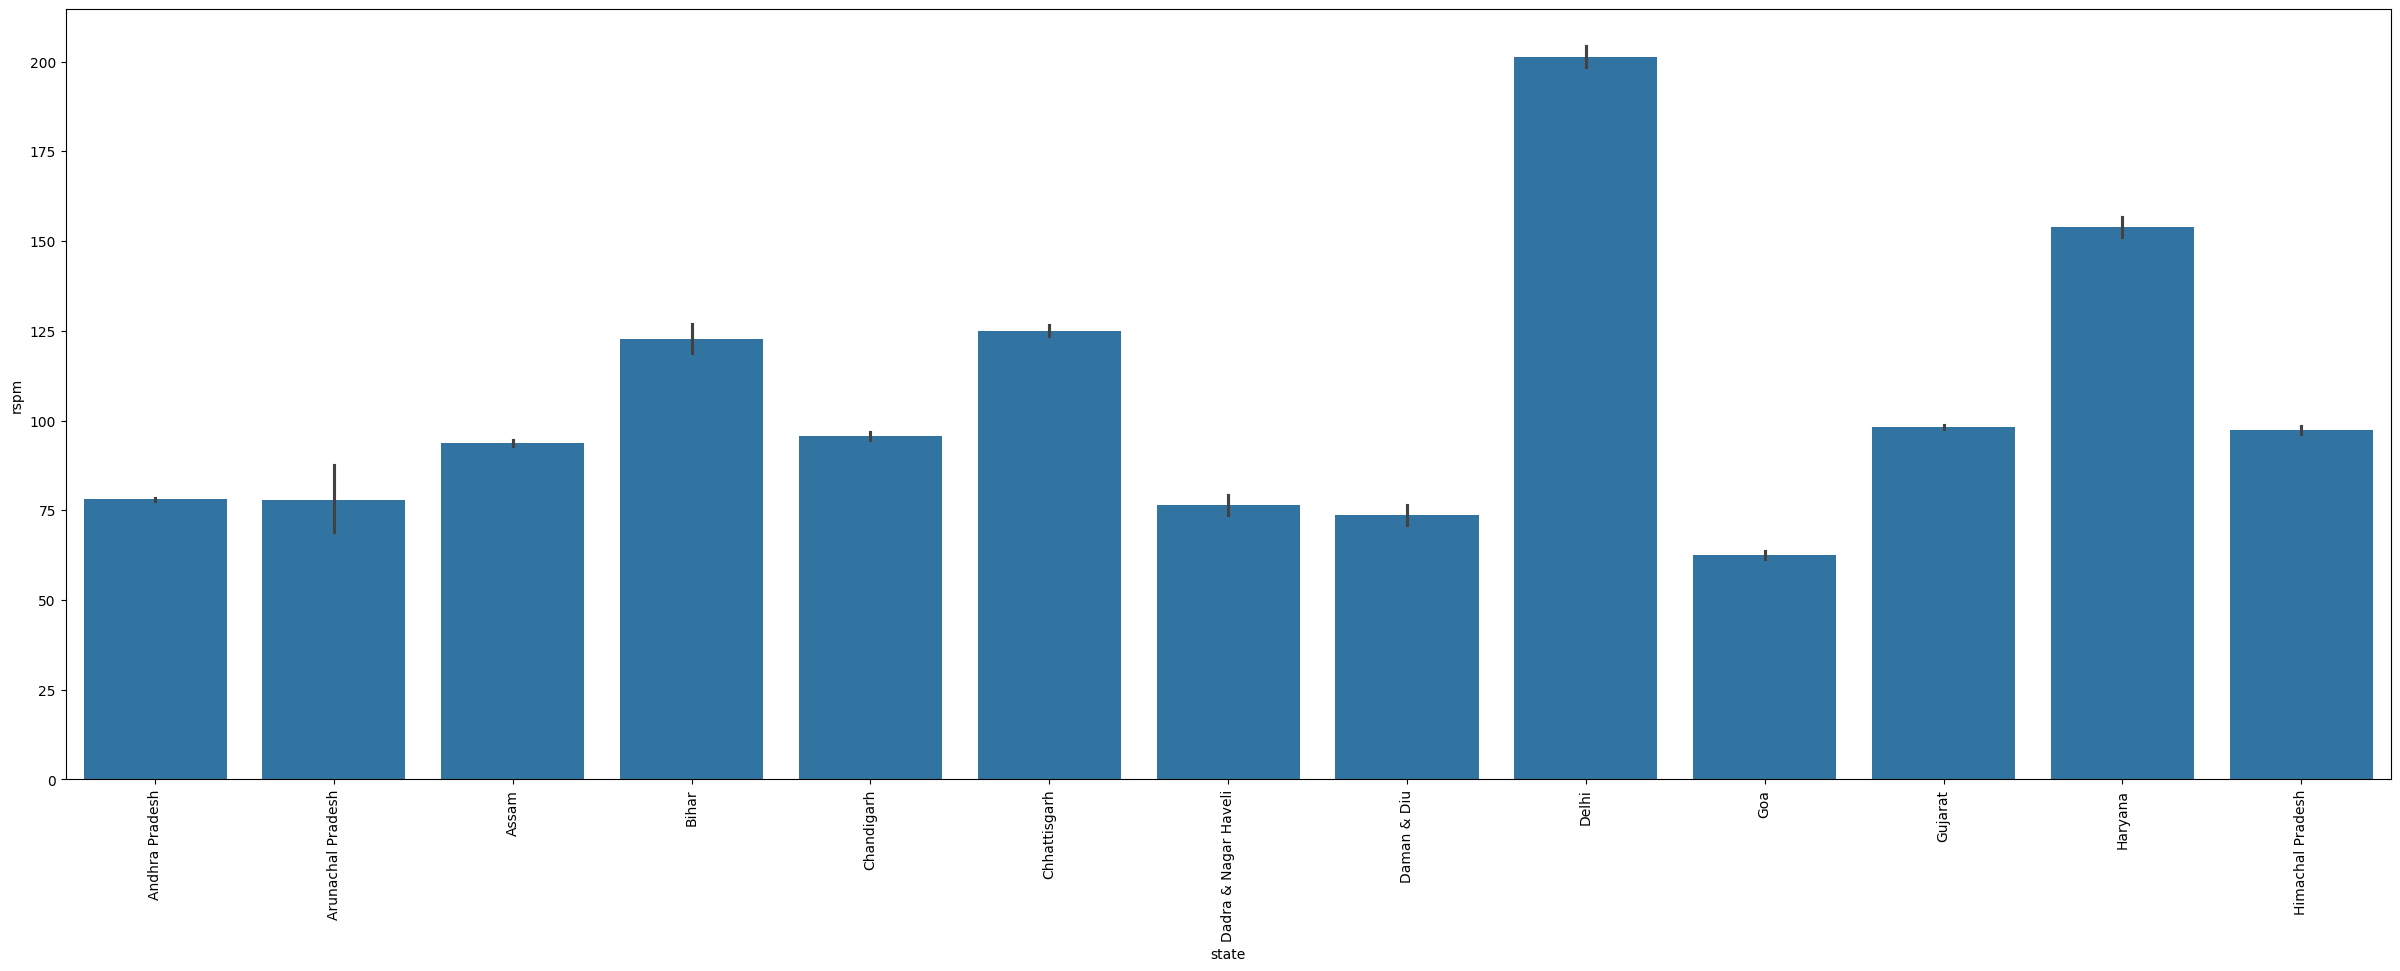

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);


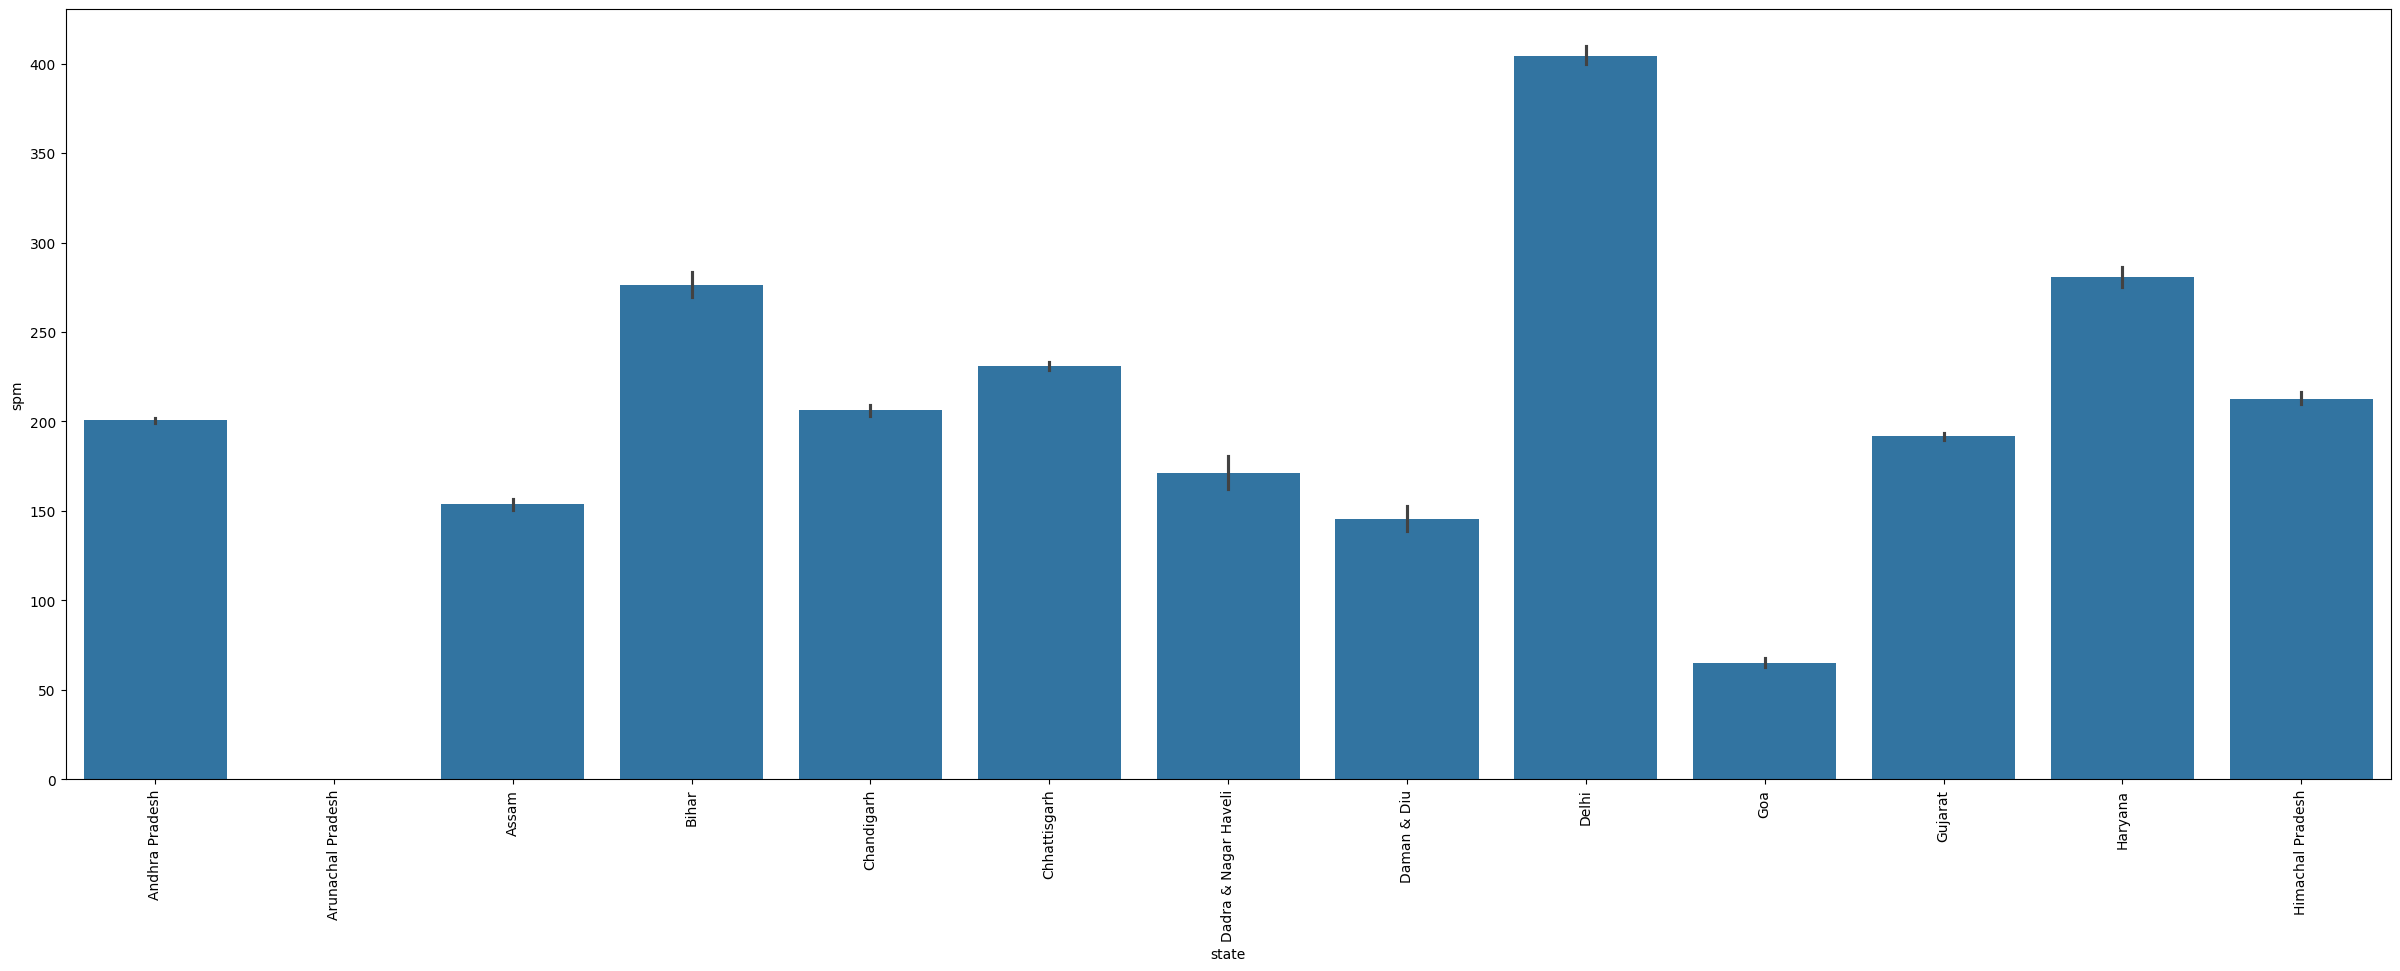

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);
# Delhi has higher spm level compared to other states

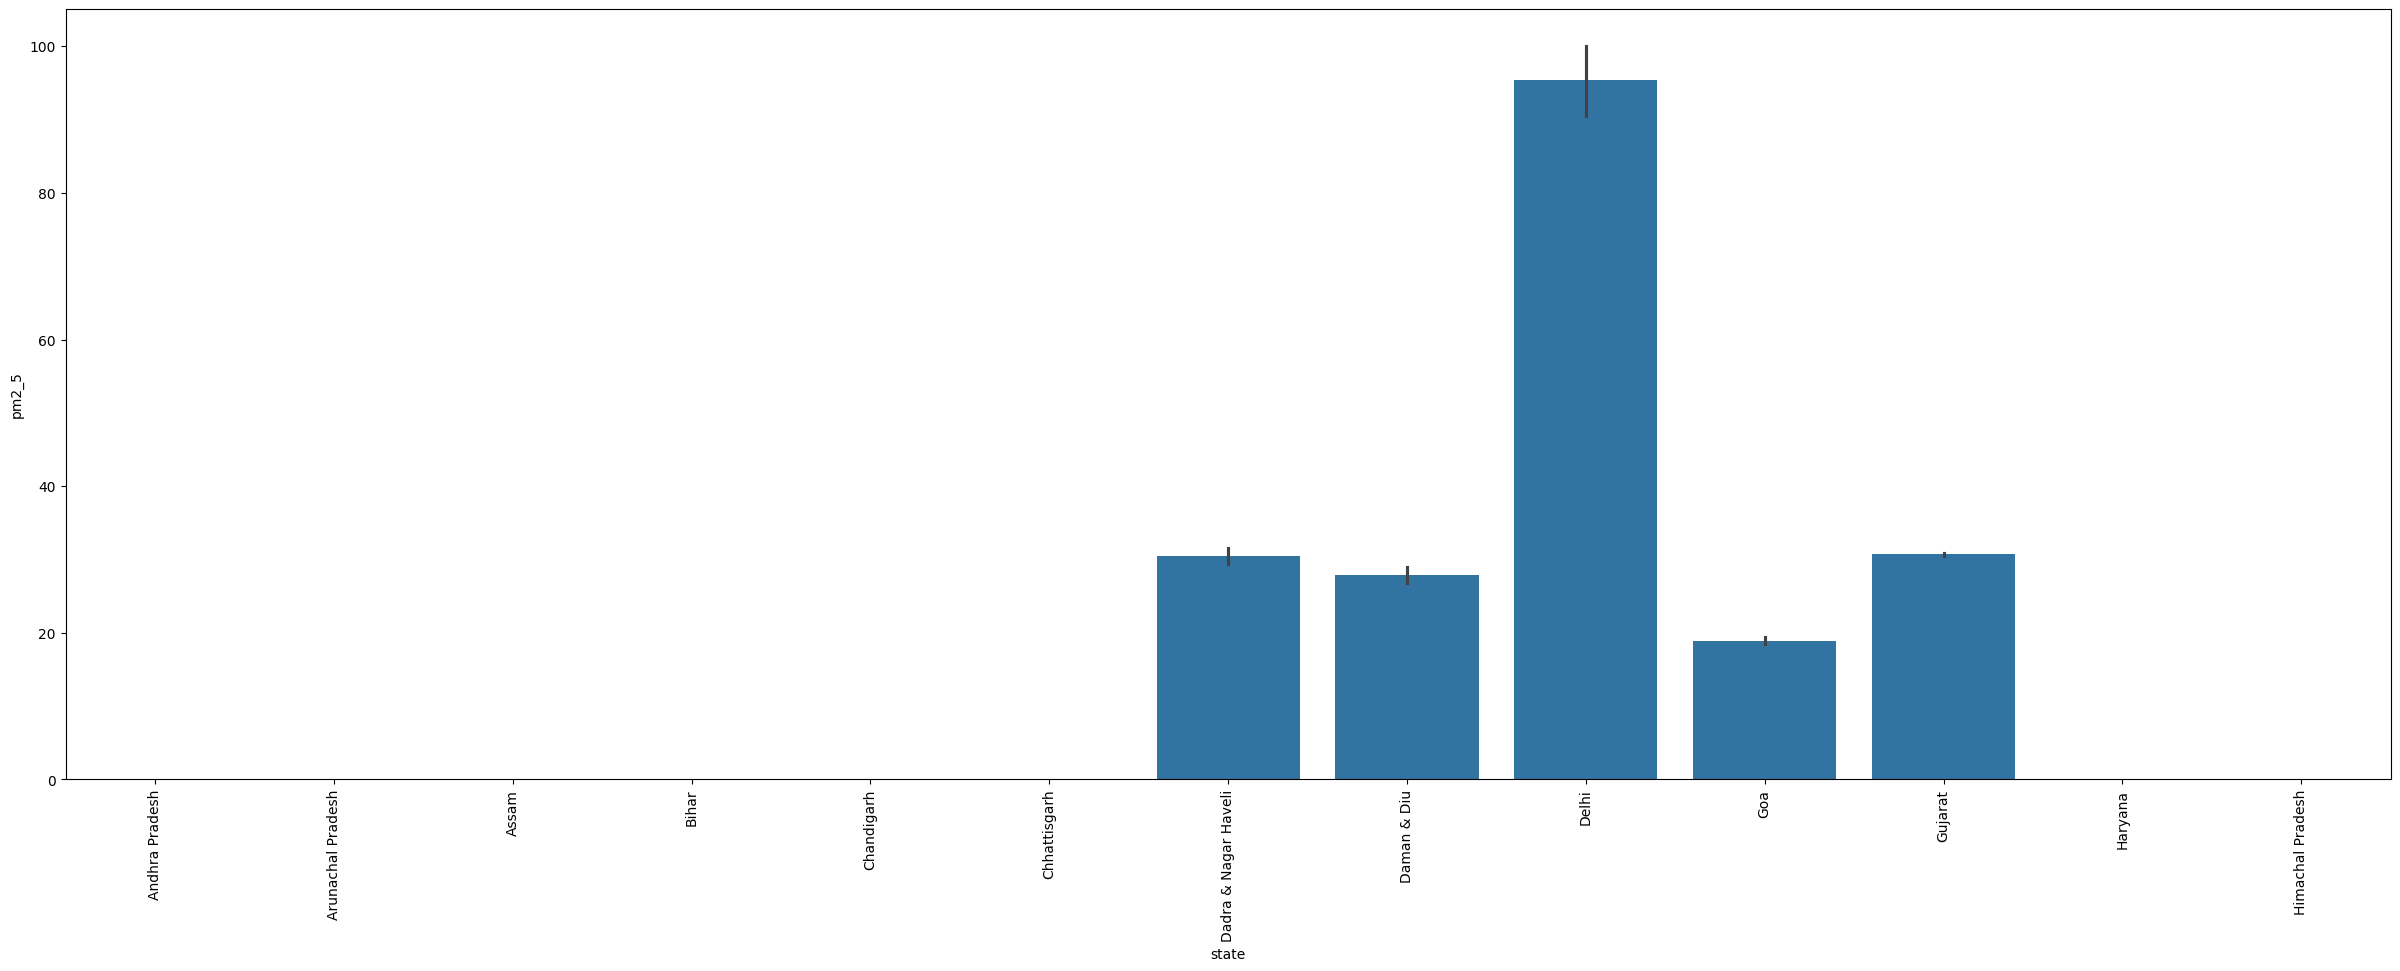

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);
# Delhi has higher pm2_5 level compared to other states

In [ ]:
nullvalues = df.isnull().sum().sort_values(ascending=False)

In [ ]:
nullvalues

,0
pm2_5,114536
spm,59139
agency,43830
stn_code,42304
rspm,12213
so2,8834
location_monitoring_station,8472
type,1570
sampling_date,0
location,0


In [ ]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [ ]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])

In [ ]:
missing_data_with_percentage

,Total,Percent
pm2_5,114536,96.431067
spm,59139,49.790781
agency,43830,36.901705
stn_code,42304,35.616923
rspm,12213,10.282467
so2,8834,7.437592
location_monitoring_station,8472,7.132814
type,1570,1.321827
sampling_date,0,0.000000
location,0,0.000000


In [ ]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
state,0
location,0
type,1570
so2,8834
no2,0
rspm,12213
spm,59139
pm2_5,114536


In [ ]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
124208,Himachal Pradesh,Nalagarh,"Residential, Rural and other Areas",1.0,19.0,155.0,NaN,NaN
124209,Himachal Pradesh,Nalagarh,"Residential, Rural and other Areas",1.0,34.0,102.0,NaN,NaN
124210,Himachal Pradesh,Nalagarh,"Residential, Rural and other Areas",2.0,24.0,115.0,NaN,NaN
124211,Himachal Pradesh,Nalagarh,"Residential, Rural and other Areas",1.0,30.0,126.0,NaN,NaN


In [ ]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [ ]:
df.fillna(0, inplace=True)


In [ ]:
df.isnull().sum()

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0
pm2_5,0


In [ ]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [ ]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [ ]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()


,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0


In [ ]:
df.spm.value_counts()

,count
spm,
0.00,59346
175.00,315
192.00,312
164.00,305
195.00,303
...,...
17.67,1
17.27,1
11.85,1


In [ ]:
def cal_SPMi(spm):
    spi=0
    if(spm <= 50):
        spi=spm*50/50
    elif(spm>50 and spm<=100):
        spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
        spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
        spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
        spi=300+(spm-350)*(100/80)
    else:
        spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [ ]:
df['AQI_Range'].value_counts()

,count
AQI_Range,
Good,59617
Poor,32995
Unhealthy,10043
Moderate,8828
Hazardous,3762
Very unhealthy,3530


In [ ]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [ ]:
Y.head()

,AQI
0,21.750
1,8.750
2,35.625
3,18.375
4,9.375


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(95020, 4) (23755, 4) (95020,) (23755,)


In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  10.380371782035468
RMSE TestData =  10.127332398572067
--------------------------------------------------
RSquared value on train: 0.9904035825719945
RSquared value on test: 0.9908151025367744


In [ ]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  1.162984280803575e-13
RMSE TestData =  0.9757389194146157
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9999147388002805


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)

In [ ]:
#fit the model on train data
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.7416403825129745
Model accuracy on test is:  0.7442341055209716
--------------------------------------------------
KappaScore is:  0.601189818721199


In [ ]:
import requests

def get_coordinates(city_name, api_key):
    """Fetch latitude and longitude for a given city using OpenWeather Geocoding API."""
    geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city_name}&limit=1&appid={api_key}"
    try:
        response = requests.get(geo_url)
        response.raise_for_status()
        data = response.json()

        if not data:
            return None, None

        lat = data[0]["lat"]
        lon = data[0]["lon"]
        return lat, lon
    except requests.exceptions.RequestException:
        return None, None

def get_air_quality(lat, lon, api_key):
    """Fetch pollutant levels (SO2, NO2, PM2.5, PM10) for given coordinates."""
    if lat is None or lon is None:
        return None

    air_url = f"http://api.openweathermap.org/data/2.5/air_pollution?lat={lat}&lon={lon}&appid={api_key}"
    try:
        response = requests.get(air_url)
        response.raise_for_status()
        data = response.json()

        pollutants = data["list"][0]["components"]
        return [
            pollutants["so2"],    # SO2
            pollutants["no2"],    # NO2
            pollutants["pm2_5"],  # PM2.5
            pollutants["pm10"]    # PM10
        ]
    except (requests.exceptions.RequestException, KeyError):
        return None

def get_pollutant_data(city_name, api_key):
    """Return pollutant levels as a list for a given city, formatted for model prediction."""
    lat, lon = get_coordinates(city_name, api_key)
    if lat is not None and lon is not None:
        pollutants = get_air_quality(lat, lon, api_key)
        if pollutants:
            # Return as a 2D list for compatibility with scikit-learn's predict
            return [pollutants]  # e.g., [[SO2, NO2, PM2.5, PM10]]
    return None
print(get_pollutant_data("new delhi", "414906df50705deda141ec103d93fdca"))
print(get_coordinates("delhi","414906df50705deda141ec103d93fdca"))

In [ ]:
log_reg.predict([[727,327.55,78.2,100]])

array(['Good'], dtype=object)

In [ ]:
log_reg.predict(get_pollutant_data("dubai", "tddOWh43Trx8+9wq3UWPnA==zbpnIT9I6CbXCtET"))

array(['Moderate'], dtype=object)

In [ ]:
log_reg.predict(get_pollutant_data("vizag", "tddOWh43Trx8+9wq3UWPnA==zbpnIT9I6CbXCtET"))


array(['Good'], dtype=object)

In [ ]:
log_reg.predict(get_pollutant_data("Eluru", "tddOWh43Trx8+9wq3UWPnA==zbpnIT9I6CbXCtET"))

array(['Poor'], dtype=object)

In [ ]:
log_reg.predict([[2.7,45,35.16,23]])

array(['Moderate'], dtype=object)

In [ ]:
log_reg.predict([[10,2.8,82,20]])

array(['Good'], dtype=object)

In [ ]:
log_reg.predict([[2,45.8,37,32]])

array(['Moderate'], dtype=object)

In [ ]:
#fit the model on train data
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9999744871925706
--------------------------------------------------
KappaScore is:  0.9999609523626695


In [ ]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9999234615777121
--------------------------------------------------
KappaScore is:  0.9998828571358552


In [ ]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9978888902851255
Model accuracy on test is:  0.9968619246861925
--------------------------------------------------
KappaScore is:  0.9951959833700648
